<style>
    .title_container {
        margin: auto;
        background: rgb(81,92,103);
        background: linear-gradient(90deg, rgba(81,92,103,1) 36%, rgba(12,35,66,1) 62%);
        border-radius: 7px;
        color: white;
        text-align:center;
        width:75%;
        padding-top:2%;
        padding-bottom:2%;
    }
    
    .question_container {
        margin: auto;
        background: rgb(84,138,142);
        background: linear-gradient(90deg, rgba(84,138,142,1) 41%, rgba(145,201,73,1) 81%);
        border-radius: 7px;
        color: white;
        text-align:left;
        width:75%;
        padding-top:1%;
        padding-bottom:1%;
        padding-left: 2%;
        margin-top:2%;
    }
    
    .question_container p {
        font-size: 16px;
    }
    
    .alert_container {
        margin: auto;
        background: rgb(142,94,84);
        background: linear-gradient(128deg, rgba(142,94,84,1) 13%, rgba(201,103,73,1) 69%);
        border-radius: 7px;
        color: white;
        text-align:left;
        width:75%;
        padding-top:1%;
        padding-bottom:1%;
        padding-left: 2%;
        margin-top:2%;
    }
    
    .alert_container p {
        font-size: 16px;
    }
    
    .code_span {
        background-color: #E2E7EC;
        padding:2px;
        border-radius:1px;
        font-family: Consolas,monaco,monospace;
        color:black;
    }
</style>

<div class ='title_container'>
    <h1> Análisis de Datos II </h1>
    <h2> Profesor: Oldemar Rodríguez </h2>
    <h3> Estudiante: Jimmy Calvo Monge </h3>
    <h3> Carné: B31281 </h3>
    <hr style='color:white; width:80%;'>
    <h4> TAREA 13 </h4>
    <h4> Fecha de entrega: 27 de Noviembre de 2022 </h4>
</div>

Importamos los módulos necesarios para resolver esta tarea.

In [8]:
### Basicos
import numpy as np
import pandas as pd
from pandas import DataFrame

### Utilidades/Varios
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from matplotlib.patches import Circle
from sklearn.tree import export_graphviz
from sklearn import tree
import seaborn as sns
import time
import graphviz
import os

### Training/Testing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#CV2
import cv2

import warnings
warnings.filterwarnings('ignore')

<div class='question_container'>
    <h2> Pregunta 1 </h2>
    <p> Basado en el código visto en el documento de la clase sobre las convoluciones, investigue y aplique al menos 3 núcleos o filtros diferentes para la imagen <code>einstein.csv</code>. Muestre las imágenes generadas. </p>
</div>

In [7]:
einstein = pd.read_csv("./datost13/einstein.csv", sep = ';', header = None)
einstein

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,27,27,27,27,27,27,29,29,31,30,...,139,143,148,142,149,150,144,143,145,145
1,27,27,27,27,27,27,29,29,31,30,...,139,143,148,142,149,150,144,143,145,145
2,31,31,31,30,26,26,21,24,27,29,...,143,147,141,148,153,150,148,143,143,143
3,27,27,26,27,27,27,29,25,29,27,...,143,144,150,151,149,149,150,143,148,148
4,25,25,30,29,26,25,26,24,27,30,...,145,148,151,153,150,148,153,148,151,151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,104,104,104,104,124,114,104,99,105,101,...,49,50,48,46,42,35,36,33,25,25
252,98,98,105,104,101,93,87,101,107,105,...,48,42,42,39,37,33,35,30,24,24
253,100,100,111,101,111,98,93,104,102,105,...,56,38,43,38,32,32,33,25,23,23
254,100,100,92,98,105,98,98,83,97,94,...,50,39,41,39,30,29,25,20,26,26


Primero guardamos este `.csv` como una imagen `.png`, por comodidad.

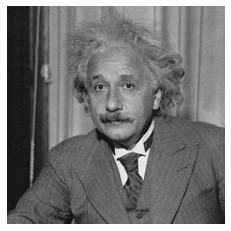

In [18]:
data = einstein.values
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
plt.axis('off')
plt.imshow(data, cmap = 'gray')
extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
plt.savefig('./einstein.png', bbox_inches=extent)

Usamos el código visto en clase para aplicar varios filtros a esta imagen. Utilizamos los núcleos clásicos, vistos en clase.

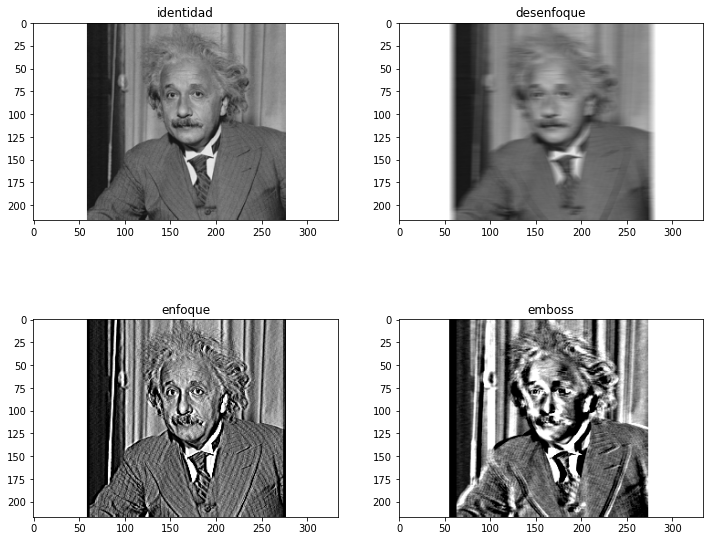

In [19]:
img = cv2.imread('./einstein.png')[...,::-1]

identidad = np.array(
  [[0, 0, 0, 
    0, 1, 0, 
    0, 0, 0]])

desenfoque = (1/9) * np.array(
  [[1, 1, 1,
    1, 1, 1,
    1, 1, 1]])

enfoque = np.array(
  [[0, -1, 0,
    -1, 5, -1,
    0, -1, 0]])

emboss = np.array(
  [[-2, -1,  0,
    -1,  1,  1,
    0,  1,  2]])

kernels = [identidad, desenfoque, enfoque, emboss]
kernel_name = ["identidad", "desenfoque", "enfoque", "emboss"]

figure, axis = plt.subplots(2, 2, figsize = (12, 10))
for kernel, name, ax in zip(kernels, kernel_name, axis.flatten()):
    img_convolusion = cv2.filter2D(img, -1, kernel)
    ax.imshow(abs(img_convolusion), cmap = "gray")
    ax.set_title(name)

plt.show()

<div class='question_container'>
    <h2> Pregunta 2 </h2>
    <p> La siguiente notación significa lo siguiente: </p>
    <ul>
        <li> <strong>CONV-K-N</strong> denota una capa convolucional con $N$ Filtros, cada uno de tamaño. $K\times K$, los parámetros "padding" y "stride" serán siempre $0$ y $1$ respectivamente. </li>
        <li> <strong>POOL-K</strong> indica una capa de "pooling" de tamaño $K\times K$ con "stride" $K$ y "padding" $0$. </li>
        <li> <strong>FLATTEN</strong> denota la capa aplanada. </li>
        <li> <strong>FC-N</strong> representa una capa completamente conectada (Fully-Connected) con $N$ neuronas.</li>
    </ul>
    <p> En la siguiente tabla, para cada capa, se muestra la cantidad de variables generadas ("feature mapping"), es decir, el tamaño de las matrices. También se muestra el número de parámetros entrenables en cada capa. </p>
    <table>
      <thead>
        <tr>
          <th>Capa</th>
          <th>Dimensión del feature mapping</th>
          <th>Número de parámetros entrenables</th>
        </tr>
      </thead>
      <tbody>
        <tr>
          <td>INPUT</td>
          <td>$128 \times 128 \times 1$</td>
          <td>$0$</td>
        </tr>
        <tr>
          <td>CONV-9-32</td>
          <td>$120 \times 120 \times 32$</td>
          <td>$2624$</td>
        </tr>
        <tr>
          <td>POOL-2</td>
          <td>$60 \times 60 \times 32$</td>
          <td>$0$</td>
        </tr>
        <tr>
          <td>CONV-5-64</td>
          <td>$56 \times 56 \times 64$</td>
          <td>$1664$</td>
        </tr>
        <tr>
          <td>POOL-2</td>
          <td>$28 \times 28 \times 64$</td>
          <td>$0$</td>
        </tr>
        <tr>
          <td>CONV-5-64</td>
          <td>$24 \times 24 \times 64$</td>
          <td>$1664$</td>
        </tr>
        <tr>
          <td>POOL-2</td>
          <td>$12 \times 12 \times 64$</td>
          <td>$0$</td>
        </tr>
        <tr>
          <td>FLATTEN</td>
          <td>$9216$</td>
          <td>$0$</td>
        </tr>
        <tr>
          <td>FC</td>
          <td>$3$</td>
          <td>$27648$</td>
        </tr>
      </tbody>
    </table>
<p> Para la tabla anterior explique cómo se obtuvo cada uno de los valores numéricos que aparecen
en cada casilla.</p>
</div>

Primero recordemos la fórmula que nos da el tamaño del output de una convolución con stride  = $S$ y padding = $P$. De acuerdo al blog [https://makeyourownneuralnetwork.blogspot.com](https://makeyourownneuralnetwork.blogspot.com/), viene dado por

$$
O = \left\lfloor \frac{I + 2P - (Ks - 1) -1}{S} + 1\right\rfloor, \quad (2.1)
$$

donde $O$ es el tamaño del output, $I$ es el tamaño del input y $Ks$ es el tamaño del kernel a aplicar. 

**Explicación de la tabla**

Cuando $I = 128, Ks = 9, P = 0, S = 1$ la fórmula $(2.1)$ nos da $O = 120$. El primer paso de esta tabla aplica $32$ convoluciones con filtros de tamaño $Ks = 9$ a la imagen original, lo cual nos regresa $32$ imágenes cada una de tamaño $120 \times 120$. Ese es el primer paso. Como hay $32$ kernels a aplicar y cada uno de ellos tiene $9^2 = 81$ entradas, sumando los $32$ parámetros desesgo que se agregan cuando se aplica cada kernel, tenemos $32\cdot 81 + 32 = 2624$ parámetros entrenables en esta etapa.

El segundo paso aplicó un pooling. En general un pooling de tamaño $K \times K$ y con zancada de $K$ hace que las matrices pasen de tener tamaño $N \times N$ a tener tamaño $(N/K) \times (N/K)$. Por esto, al aplicar un pooling de este tipo con $K=2$ nuestras $32$ matrices de tamaño $120 \times 120$ pasan a ser de tamaño $60 \times 60$. En un pooling no hay parámetros entrenables.

En el otro paso se aplicaron $64$ convoluciones a cada una de las imágenes anteriores. Cada imagen tenía un tamaño de $60\times 60$ entonces si aplicamos la fórmula $(2.1)$ usando $Ks = 5$ tendremos que el nuevo tamaño de las matrices será $O=56$. Por eso llegamos a una colección de tamaño $56\times 56 \times 64$. Note que esto es **para cada una de las $32$ matrices que obtuvimos en el paso trans-anterior**. En realidad tenemos muchas más matrices en este paso, en total. Hay $64 \times 32 = 2048$. Hay $64$ kernels, cada uno de dimensión $5^2 = 25$ junto con un sesgo para cada uno, por lo tanto en este paso tenemos $64 \times 25 + 64 = 1664$ parámetros entrenables.

Seguimos con otro Pooling de $2 \times 2$, de manera que nuestras matrices se reducen a la mitad de su tamaño, y por tanto tenemos $64$ matrices de tamaño $28 \times 28$. Nuevamente no hay parámetros entrenables. 

Luego otra convolución con $Ks = 5$ toma cada una de estas matrices y la transforma en una de tamaño $O=24$, que es lo que se obtiene nuevamente de aplicar la fórmula $(2.1)$.

Seguimos con otro Pooling de $2 \times 2$, de manera que nuestras matrices se reducen a la mitad de su tamaño, y por tanto tenemos $64$ matrices de tamaño $12 \times 12$. Nuevamente no hay parámetros entrenables. 

Luego, un flatten toma estas $64$ matrices de tamaños $12 \times 12$ y las aplana para formar un vector de largo $12 \cdot 12 \cdot 64 = 9216$. Con tres neuronas hay $2 \cdot 9216 = 27648$ pesos a entrenar en una red neuronal clásica, que es en la cual se envía el vector flattened final, como imput.

<div class='question_container'>
    <h2> Pregunta 3 </h2>
    <p> Para cada capa, calcule la cantidad de variables generadas (\feature mapping"), es decir, el tamaño de las matrices. Además, calcule el número de parámetros entrenables. La notación sigue la siguiente convención: </p>
    <ul>
        <li> <strong>CONV-K-N</strong> denota una capa convolucional con $N$ Filtros, cada uno de tamaño $K\times K$, los parámetros "padding" y "stride" serán siempre $0$ y $1$ respectivamente. </li>
        <li> <strong>POOL-K-S</strong> indica una capa de "pooling" de tamaño $K \times K$ con "stride" (zancada) $S$ y "padding" $0$.</li>
        <li> <strong>ReLU</strong> indica la aplicación de la función de activación ReLU.</li>
        <li> <strong>FLATTEN</strong> denota la capa aplanada.</li>
        <li> <strong>FC-N</strong> representa una capa completamente conectada (Fully-Connected) con N neuronas.</li>
    </ul>
    <table>
      <thead>
        <tr>
          <th>Capa</th>
          <th>Dimensión del feature mapping</th>
          <th>Número de parámetros entrenables</th>
        </tr>
      </thead>
      <tbody>
        <tr>
          <td>INPUT</td>
          <td>$32 \times 32 \times 3$</td>
          <td>$0$</td>
        </tr>
        <tr>
          <td>CONV-3-8</td>
          <td></td>
          <td></td>
        </tr>
        <tr>
          <td>ReLU</td>
          <td></td>
          <td></td>
        </tr>
        <tr>
          <td>POOL-2-2</td>
          <td></td>
          <td></td>
        </tr>
        <tr>
          <td>CONV-3-16</td>
          <td></td>
          <td></td>
        </tr>
        <tr>
          <td>ReLU</td>
          <td></td>
          <td></td>
        </tr>
        <tr>
          <td>POOL-3-1</td>
          <td></td>
          <td></td>
        </tr>
        <tr>
          <td>FLATTEN</td>
          <td></td>
          <td></td>
        </tr>
        <tr>
          <td>FC-10</td>
          <td></td>
          <td></td>
        </tr>
      </tbody>
    </table>
</div>

**Respuesta:** Propongo que la tabla queda de esta forma:
<table>
  <thead>
    <tr>
      <th>Capa</th>
      <th>Dimensión del feature mapping</th>
      <th>Número de parámetros entrenables</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>INPUT</td>
      <td>$32 \times 32 \times 3$</td>
      <td>$0$</td>
    </tr>
    <tr>
      <td>CONV-3-8</td>
      <td>$30 \times 30 \times 8$</td>
      <td>$224$</td>
    </tr>
    <tr>
      <td>ReLU</td>
      <td>$30 \times 30 \times 8$</td>
      <td>$0$</td>
    </tr>
    <tr>
      <td>POOL-2-2</td>
      <td>$15 \times 15 \times 8$</td>
      <td>$0$</td>
    </tr>
    <tr>
      <td>CONV-3-16</td>
      <td>$13 \times 13 \times 16$</td>
      <td>$1168$</td>
    </tr>
    <tr>
      <td>ReLU</td>
      <td>$13 \times 13 \times 16$</td>
      <td>$0$</td>
    </tr>
    <tr>
      <td>POOL-3-1</td>
      <td>$11 \times 11 \times 16$</td>
      <td>$0$</td>
    </tr>
    <tr>
      <td>FLATTEN</td>
      <td>$1936$</td>
      <td>$0$</td>
    </tr>
    <tr>
      <td>FC-10</td>
      <td>$10$</td>
      <td>$19370$</td>
    </tr>
  </tbody>
</table>

**Explicación**

1. El primer paso es aplicar convoluciones con $8$ kernels, cada uno de tamaño $3\times 3$. Usando la fórmula $(2.1)$ con $I = 32, P = 0, S = 1, Ks = 3$ tenemos que el tamaño de las nuevas matrices será $30 \times 30$. Luego terminaremos con $8$ matrices de $30\times 30$ en este paso, una para cada una de las tres matrices $32\times 32$ con las que iniciamos. Aquí hay $3 \cdot 8 \cdot 3^2 + 8 = 224$ parámetros a entrenar (hay que multiplicar por $3$ por la presencia de $3$ canales la cantidad de parámetros posibles en los filtros, y sumar los sesgos. Los filtros pueden variar entre los $3$ canales).
2. El paso de ReLU no hace nada más que aplicar la función ReLu a cada entrada del paso anterior, así que terminamos con las mismas dimensiones. No hay parámetros a entrenar.
3. Al hacer un pool con $K=2$ y zancada $S=2$ lo único que hacemos es reducir las dimensiones de las matrices a la mitad. Así que aquí tenemos $15 \times 15 \times 8$. No hay parámetros entrenables.
4. Al aplicar convoluciones con $16$ filtros, cada uno de tamaño $3\times 3$ podemos usar la fórmula $(2.1)$ con $I = 15, P = 0, S = 1, Ks = 3$ y tendremos que el tamaño de las nuevas matrices será $13\times 13$. Tendremos $16$ matrices asociadas a cada una de las matrices del paso anterior. Aquí hay $8 \cdot 16 \cdot 3^2 + 16 = 1168$ parámetros a entrenar, siguiendo un argumento similar al paso trans-anterior.
5. Nuevamente un ReLU no cambia las dimensiones ni agrega parámetros a entrenar.
6. Al hacer un pooling con tamaño $3 \times 3$ y zancada $S = 1$ podemos aplicar nuevamente la fórmula $(2.1)$ con $Ks=3$ ya que el modo de recorrido que hace un pooling es el mismo que se hace en una convolución. La diferencia viene en el cálculo de las nuevas entradas: en el pooling se selecciona una submatriz de tamaño $Ks \times Ks$ de la matriz original y se aplica un máximo o promedio sobre esa selección, en la convolución se sobrepone el filtro sobre esa selección de tamaño $Ks \times Ks$ y se calcula el producto punto con el filtro. Al aplicar la fórmula con $Ks=3, I=13$ tenemos que las nuevas matrices después del pooling son de dimensión $11 \times 11$ y hay cuantas habían en el paso anterior, es decir $16$.
7. Finalmente, el flatten nos da un vector de tamaño $16 \times 11 \times 11 = 1936$.
8. Al aplicarla en una capa densa de $10$ neuronas tendremos que entrenar $1936 \times 10 + 10 = 19370$ pesos y sesgos (hay un sesgo por neurona).

Lo verificamos con código utilizando `tensorflow.keras`

In [34]:
import tensorflow.keras as keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Sequential

In [35]:
model = Sequential()
model.add(Conv2D(filters = 8,
                 kernel_size = (3,3),
                 activation = 'relu',
                 input_shape = (32,32,3)))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
model.add(Conv2D(filters = 16,
                 kernel_size = (3,3),
                 activation = 'relu',
                 input_shape = (15,15,8)))
model.add(MaxPooling2D(pool_size = (3,3), strides = (1,1)))
model.add(Flatten())
model.add(Dropout(0))
model.add(Dense(10, activation = "relu"))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 30, 30, 8)         224       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 15, 15, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 13, 13, 16)        1168      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 11, 11, 16)       0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 1936)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1936)            

En efecto obtenemos la arquitectura que explicamos arriba.

<div class='question_container'>
    <h2> Pregunta 4 </h2>
    <p> Complete en el siguiente gráfico la matriz de la derecha, para esto utilice mean-pooling, es decir, agrupación de capas mediante el promedio.</p>
</div>

**Respuesta:**

El promedio del bloque rosado queda:

In [40]:
a = (1 + 5 + 6 + 4)/4
a

4.0

El promedio del bloque azul queda:

In [41]:
b = (1 + 1 + 8 + 6)/4
b

4.0

El promedio del bloque verde queda:

In [42]:
c = (3 + 6 + 8 + 5)/4
c

5.5

El promedio del bloque lila queda:

In [44]:
d = (3 + 2 + 9 + 1)/4
d

3.75

Por tanto, la matriz del pooling queda:

In [45]:
np.array([[a, b],[c, d]])

array([[4.  , 4.  ],
       [5.5 , 3.75]])

Fin.

<div class='question_container'>
    <h2> Pregunta 5 </h2>
    <p> Descomprima el archivo <code>piedrapapeltijera.zip</code>. Este conjunto de imágenes tiene 3 clases: piedra, papel y tijera. El objetivo del conjunto de datos es identificar la forma de la mano. Con la tabla de datos realice lo siguiente:</p>
    <ul>
        <li> Cargue las imágenes contenidas en el archivo <code>piedrapapeltijera.zip</code> y obtenga la etiqueta
            correspondiente para cada imagen. </li>
        <li> Divida la tabla utilizando un 90% para entrenamiento y un 10% para pruebas. Luego
            normalice las tablas y aplique el one-hot-encoding a las etiquetas.</li>
        <li> Imprima una imágen de cada clase de la tabla de entrenamiento. </li>
        <li> Genere la estructura de Redes Neuronales Convolucionales. Para esto utilice al menos 2 capas de convolución 2D y 2 capas de <code>Maxpooling</code>, luego utilice <code>flatten()</code>, <code>Dropout()</code> y al menos 2 capas ocultas. Muestre un resumen del modelo.</li>
    <li> Configure el modelo con la función de costo <code>categorical crossentropy</code>, la función de
        optimización <code>adam</code> y la métrica <code>accuracy</code>. </li>
    <li> Entrene el modelo con los siguientes parámetros <code>epochs=50</code> y <code>batch_size=64</code>. Esto puede tardar un rato. </li>
    <li> Utilice el método <code>evaluate()</code> para evaluar las predicciones y el error global. Establezca el valor de 0 para el parámetro <code>verbose</code> para omitir la salida en consola. </li>
        <li> Obtenga y cargue 10 fotos de su mano haciendo formas de piedra, papel y tijera. Luego con ayuda del modelo realice una predicción de esas 10 imágenes. Muestre y comente los resultados. </li>
        <li> Repita nuevamente los pasos anteriores, pero agregue a las capas de convolución el siguiente parámetro: <code>kernel_initializer = glorot_uniform</code>. ¿Mejoran los resultados? Explique e investigue sobre el parámetro <code>kernel_initializer</code>. </li>
    </ul>
</div>

Primero creamos los datos completos con sus etiquetas. 

In [57]:
import re

labels = []
imagenes = []

for carpeta in next(os.walk('./datost13/piedrapapeltijera/piedrapapeltijera/'))[1]:
    for nombrearchivo in next(os.walk('./datost13/piedrapapeltijera/piedrapapeltijera' + '/' + carpeta))[2]:
        if re.search("\\.(jpg|jpeg|png|bmp|tiff)$", nombrearchivo):
            try:
                img = cv2.imread('./datost13/piedrapapeltijera/piedrapapeltijera' + '/' + carpeta + '/' + nombrearchivo)[...,::-1]
                img = cv2.resize(img, (64, 64))
                imagenes.append(img)
                labels.append(carpeta)
            except Exception as e:
                print("No se pudo cargar la imagen: " + nombrearchivo + " en la carpeta: " + carpeta)

In [58]:
X = np.array(imagenes, dtype = np.float32)
y = np.array(labels)

Unos ejemplos:

0
papel


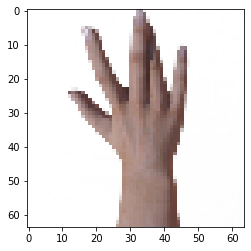

In [85]:
primer_indice_papel = labels.index('papel') # El primer indice en el cual sale papel (es 0).
print(primer_indice_papel)
print(labels[primer_indice_papel])
plt.imshow(imagenes[primer_indice_papel])

1680
tijera


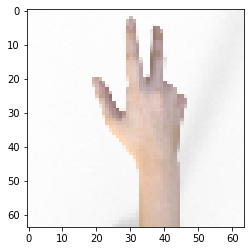

In [82]:
primer_indice_tijera = labels.index('tijera') # El primer indice en el cual sale tijera.
print(primer_indice_tijera)
print(labels[primer_indice_tijera])
plt.imshow(imagenes[primer_indice_tijera])

840
piedra


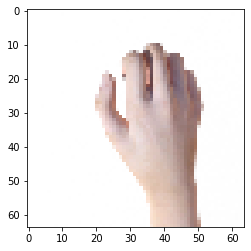

In [84]:
primer_indice_piedra = labels.index('piedra') # El primer indice en el cual sale piedra.
print(primer_indice_piedra)
print(labels[primer_indice_piedra])
plt.imshow(imagenes[primer_indice_piedra])

In [86]:
print(f"""
El tamaño de los datos es: {X.shape}.
""")


El tamaño de los datos es: (2520, 64, 64, 3).



En total tenemos $2520$ observaciones, cada una de las cuales es un tensor de dimensiones $64 \times 64 \times 3$.
Ahora, dividimos nuestros datos en conjuntos de entrenamiento y prueba.

In [145]:
# Dividir en train y test
train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size = 0.1)

# Normalizar
train_X = train_X / 255.
test_X  = test_X / 255.

# Cambiamos las etiquetas de categoricas a one-hot encoding
train_Y_one_hot = pd.get_dummies(train_Y)
test_Y_one_hot = pd.get_dummies(test_Y)

In [146]:
train_Y_one_hot.head(2)

,papel,piedra,tijera
0,0,0,1
1,1,0,0


In [147]:
train_Y_one_hot = train_Y_one_hot.to_numpy()
test_Y_one_hot = test_Y_one_hot.to_numpy()

In [148]:
train_Y_one_hot

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]], dtype=uint8)

In [149]:
print(train_X.shape)
print(train_Y_one_hot.shape)

(2268, 64, 64, 3)
(2268, 3)


In [150]:
print(test_X.shape)
print(test_Y_one_hot.shape)

(252, 64, 64, 3)
(252, 3)


Aquí lo único que se hizo fue que las etiquetas fueran one-hot encoding usando las tres clases Piedra, Papel o Tijera.

### Estructura de la Red Neuronal Convolucional.

En seguida usamos el método secuencial de `tensorflow.keras` para generar la arquitectura de nuestra CNN. 

In [151]:
modelo_ppt = Sequential() #ppt := piedra, papel, tijera.

# Primera Convolución 2D
modelo_ppt.add(Conv2D(12, kernel_size=(3, 3),
                        activation='linear', padding='same', input_shape = (64,64,3)))
# ReLU
modelo_ppt.add(LeakyReLU(alpha=0.1))
# Pooling
modelo_ppt.add(MaxPooling2D((2, 2), padding='same'))

# Segunda Convolución 2D
modelo_ppt.add(Conv2D(5, kernel_size=(3, 3),
                        activation='linear', padding='same', input_shape = (32,32,12)))

# ReLU
modelo_ppt.add(LeakyReLU(alpha=0.2))
# Pooling
modelo_ppt.add(MaxPooling2D((2, 2),padding='same'))


modelo_ppt.add(Dropout(0.5))
modelo_ppt.add(Flatten())

# Primera Capa Neuronal
modelo_ppt.add(Dense(32, activation='linear'))
modelo_ppt.add(LeakyReLU(alpha=0.1))

# Segunda Capa Neuronal
modelo_ppt.add(Dropout(0.2))
modelo_ppt.add(Dense(10, activation='linear'))

# Capa Final
modelo_ppt.add(Dense(len(np.unique(y)), activation='softmax'))

    
modelo_ppt.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 64, 64, 12)        336       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 64, 64, 12)        0         
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 32, 32, 12)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 32, 32, 5)         545       
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 32, 32, 5)         0         
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 16, 16, 5)        0         
 g2D)                                                

Inciso e)

In [152]:
modelo_ppt.compile(
    loss = keras.losses.categorical_crossentropy, 
    optimizer = 'adam',
    metrics = ['accuracy']
)

Inciso f) Entrenamiento.

In [153]:
#Entrenamos el modelo
start = time.time()
modelo_ppt.fit(train_X, train_Y_one_hot, batch_size = 64,
                epochs = 50, verbose = 0)
end = time.time()
print(f"Entrenar el modelo duró {(end - start)/60} minutos.")

Entrenar el modelo duró 2.865930664539337 minutos.


In [154]:
#Evaluamos con respecto a la tabla de testing
test_eval = modelo_ppt.evaluate(test_X, test_Y_one_hot, verbose=1)
print('\nTest loss:', test_eval[0])

8/8 [==============================] - 0s 16ms/step - loss: 2.5318e-05 - accuracy: 1.0000

Test loss: 2.53178077400662e-05


In [155]:
print('Test accuracy:', test_eval[1])

Test accuracy: 1.0


In [157]:
labels_use = ['papel','piedra','tijera']
predicciones_train = modelo_ppt.predict(np.array([train_X[i] for i in range(0,len(train_Y))]), verbose = 0)
predicciones_train = [np.argmax(pred_train) for pred_train in predicciones_train]
predicciones_train = [labels_use[pred_train] for pred_train in predicciones_train]
confusion_matrix(train_Y, predicciones_train)

array([[757,   0,   0],
       [  0, 764,   0],
       [  0,   0, 747]], dtype=int64)

In [158]:
predicciones_test = modelo_ppt.predict(np.array([test_X[i] for i in range(0,len(test_Y))]), verbose = 0)
predicciones_test = [np.argmax(pred_test) for pred_test in predicciones_test]
predicciones_test = [labels_use[pred_test] for pred_test in predicciones_test]
confusion_matrix(test_Y, predicciones_test)

array([[83,  0,  0],
       [ 0, 76,  0],
       [ 0,  0, 93]], dtype=int64)

Parece que tuvimos una predicción perfecta con esta arquitectura!
Claramente, esto no es motivo para ningún artículo. Puede tratarse de un fenómeno de overfitting.
Por ejemplo, veamos lo que sucede con las fotos que tomé de mis propias manos:

In [185]:
imgs_jimmy = []
etiquetas = []
for nombrearchivo in os.listdir('./jimmy_manos'):
    etiquetas.append(nombrearchivo.split('_')[1])
    mano_jimmy = cv2.imread(f'./jimmy_manos/{nombrearchivo}')[...,::-1]
    mano_jimmy = cv2.resize(mano_jimmy, (64, 64))
    imgs_jimmy.append(mano_jimmy)

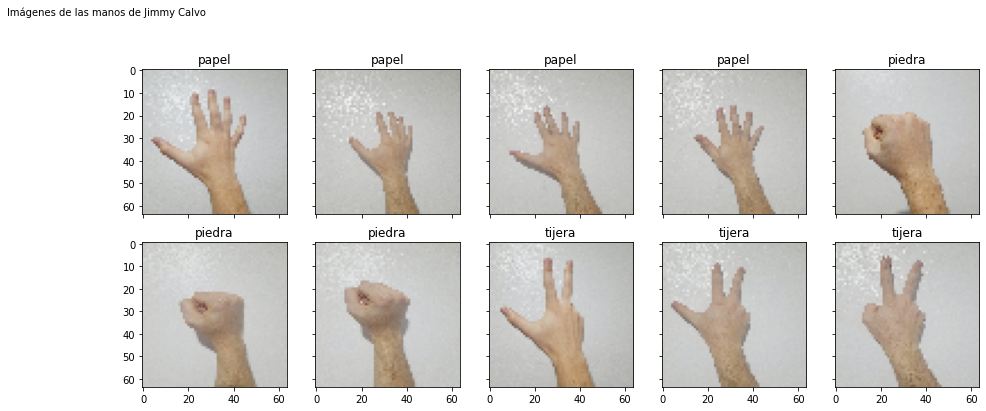

In [225]:
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

fig = plt.figure(1, (15., 15.))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(2, 5),
                 axes_pad=0.4,
                 )
for i, axes in enumerate(grid):
    axes.set_title(etiquetas[i], fontdict=None, loc='center', color = "k")
    axes.imshow(imgs_jimmy[i])
fig.text(0,0.7,"Imágenes de las manos de Jimmy Calvo", color ="k")

plt.show()

In [224]:
print("Predicciones:")
[labels_use[np.argmax(modelo_ppt.predict(np.array([imgs_jimmy[k]]), verbose = 0))] for k in range(len(imgs_jimmy))]

Predicciones:


['papel',
 'papel',
 'papel',
 'papel',
 'piedra',
 'papel',
 'piedra',
 'papel',
 'papel',
 'papel']

El problema fue en tijera, que fue predicho como papel, lamentablemente.

Finalmente, volvemos a repetir el procedimiento haciendo uso del parámetro `kernel_initializer = glorot_uniform`

In [231]:
modelo_ppt = Sequential() #ppt := piedra, papel, tijera.

# Primera Convolución 2D
modelo_ppt.add(Conv2D(filters = 12,
                      kernel_size=(3, 3),
                      activation='linear',
                      padding='same',
                      input_shape = (64,64,3),
                      kernel_initializer = 'glorot_uniform'))
# ReLU
modelo_ppt.add(LeakyReLU(alpha=0.1))
# Pooling
modelo_ppt.add(MaxPooling2D((2, 2), padding='same'))

# Segunda Convolución 2D
modelo_ppt.add(Conv2D(filters = 5,
                      kernel_size=(3, 3),
                      activation='linear',
                      padding='same',
                      input_shape = (32,32,12),
                      kernel_initializer = 'glorot_uniform'))

# ReLU
modelo_ppt.add(LeakyReLU(alpha=0.2))
# Pooling
modelo_ppt.add(MaxPooling2D((2, 2),padding='same'))


modelo_ppt.add(Dropout(0.5))
modelo_ppt.add(Flatten())

# Primera Capa Neuronal
modelo_ppt.add(Dense(32, activation='linear'))
modelo_ppt.add(LeakyReLU(alpha=0.1))

# Segunda Capa Neuronal
modelo_ppt.add(Dropout(0.2))
modelo_ppt.add(Dense(10, activation='linear'))

# Capa Final
modelo_ppt.add(Dense(len(np.unique(y)), activation='softmax'))

modelo_ppt.compile(
    loss = keras.losses.categorical_crossentropy, 
    optimizer = 'adam',
    metrics = ['accuracy']
)

#Entrenamos el modelo
start = time.time()
modelo_ppt.fit(train_X, train_Y_one_hot, batch_size = 64,
                epochs = 50, verbose = 0)
end = time.time()
print(f"Entrenar el modelo duró {(end - start)/60} minutos.")

#Evaluamos con respecto a la tabla de testing
test_eval = modelo_ppt.evaluate(test_X, test_Y_one_hot, verbose=1)
print('\nTest loss:', test_eval[0])
print('Test accuracy:', test_eval[1])


print("Predicciones en entrenamiento:")
predicciones_train = modelo_ppt.predict(np.array([train_X[i] for i in range(0,len(train_Y))]), verbose = 0)
predicciones_train = [np.argmax(pred_train) for pred_train in predicciones_train]
predicciones_train = [labels_use[pred_train] for pred_train in predicciones_train]
print(confusion_matrix(train_Y, predicciones_train))

print("Predicciones en prueba:")
predicciones_test = modelo_ppt.predict(np.array([test_X[i] for i in range(0,len(test_Y))]), verbose = 0)
predicciones_test = [np.argmax(pred_test) for pred_test in predicciones_test]
predicciones_test = [labels_use[pred_test] for pred_test in predicciones_test]
print(confusion_matrix(test_Y, predicciones_test))

print("Predicciones con las manos de Jimmy:")
print([labels_use[np.argmax(modelo_ppt.predict(np.array([imgs_jimmy[k]]), verbose = 0))] for k in range(len(imgs_jimmy))])

Entrenar el modelo duró 3.041554272174835 minutos.
8/8 [==============================] - 0s 17ms/step - loss: 2.1069e-05 - accuracy: 1.0000

Test loss: 2.1069045033073053e-05
Test accuracy: 1.0
Predicciones en entrenamiento:
[[757   0   0]
 [  0 764   0]
 [  0   0 747]]
Predicciones en prueba:
[[83  0  0]
 [ 0 76  0]
 [ 0  0 93]]
Predicciones con las manos de Jimmy:
['papel', 'papel', 'papel', 'papel', 'piedra', 'piedra', 'piedra', 'papel', 'tijera', 'tijera']


En `kernel_initializer` sirve para dar una proposición inicial de los kernels que se utilizarán en el ajuste de la capa convolucional. Luego, con propagación hacia atrás y descenso del gradiente, esta proposición inicial se itera hasta alcanzar convergencia. Inicializa los kernels con muestras aleatorias de una distribución normal. Específicamente:

*Draws samples from a truncated normal distribution centered on 0 with stddev = sqrt(2 / (fan_in + fan_out)) where fan_in is the number of input units in the weight tensor and fan_out is the number of output units in the weight tensor.*

De acuerdo a la documentación de Keras: [Keras Initializers](https://keras.io/api/layers/initializers/).

Vea que en este caso, usando este parámetro, fuimos capaces de mejorar la predicción sobre las imágenes de mis propias mano (por ejemplo, en tijera). Sin embargo tomó más tiempo en entrenar.

<div class='question_container'>
    <h2> Pregunta 6 </h2>
    <p> Vamos a usar las tablas de datos <code>ZipDataTestCod.csv</code> y <code>ZipDataTrainCod.csv</code>, la primera columna guarda la información de tipo de dígito es: un número del 0 al 9, mientras que las otras 256 columnas guardan la información de cada pixel, para una imagen de 16x16 de un solo canal. Para esto realice lo siguiente: </p>
    <ul>
        <li> Cargue las tablas de datos <code>ZipDataTestCod.csv, ZipDataTrainCod.csv</code> en Python. </li>
    <li> Genere las tablas de las categorías (<code>Y_train</code> y <code>Y_test</code>) y paselas a la forma one-hot-encoding. </li>
    <li> Genere las tablas de las imágenes (<code>X_train</code> y <code>X_test</code>) realizando un <code>reshape(-1, 16,16,1)</code> con <code>numpy</code> y seguidamente normalice dichas tablas. </li>
    <li> Imprima una imagen de la tabla <code>X_train</code>. </li>
        <li> Genere un modelo de Redes Neuronales Convolucionales. Para esto utilice 2 capas de
            convolución 2d y 2 capas de <code>Maxpooling</code>, luego utilice <code>flatten()</code>, <code>Dropout()</code> y al menos
            2 capas ocultas. Utilice la función de optimización <code>RMSprop</code>, la función de costo
            <code>categorical crossentropy</code> y la métrica <code>accuracy</code>. </li>
        <li> Haga un resumen del modelo. </li>
    <li> Entrene el modelo con los siguientes parámetros <code>epochs=60</code> y <code>batch_size=18</code>. Esto puede tardar un rato. </li>
    <li> Utilice el método <code>evaluate()</code> para evaluar las predicciones y el error global. Establezca el valor de 0 para el parámetro verbose para omitir la salida en consola. </li>
        <li> Obtenga las predicciones sobre la tabla de testing utilizando la función <code>predict()</code>. Genere la matriz de confusión, obtenga la precisión global y por categoría. Muestre y comente los resultados. </li>
        <li> Tome 4 imágenes de la tabla de testing, muéstrelas y realice una predicción con el modelo generado. </li>
    </ul>
</div>

In [245]:
zipdata_train = pd.read_csv("./datost13/ZipDataTrainCod.csv",sep=';')
zipdata_test = pd.read_csv("./datost13/ZipDataTestCod.csv",sep=';')

X_train = zipdata_train.drop(['Numero'],axis=1)
y_train = zipdata_train['Numero']
X_test = zipdata_test.drop(['Numero'],axis=1)
y_test = zipdata_test['Numero']

In [246]:
X_train

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257
0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,-0.167,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,-1.000,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.996,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,-0.067,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,0.234,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7286,-1.0,-1.0,-1.0,-0.988,-0.527,-0.208,0.620,1.000,0.467,0.396,...,-0.116,0.899,0.416,-0.510,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
7287,-1.0,-1.0,-1.0,-0.990,0.708,0.557,0.347,-0.107,-0.758,-0.975,...,0.697,0.636,0.167,-0.968,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
7288,-1.0,-1.0,-1.0,-0.783,-0.984,-0.827,0.068,1.000,1.000,1.000,...,0.805,1.000,1.000,0.727,-0.342,-0.933,-1.000,-1.000,-1.000,-1.0
7289,-1.0,-1.0,-1.0,-1.000,-1.000,-0.549,0.463,0.999,0.999,0.999,...,-0.231,0.621,0.999,-0.042,-0.231,-0.687,-1.000,-1.000,-1.000,-1.0


In [247]:
train_Y_one_hot = pd.get_dummies(y_train).to_numpy()
test_Y_one_hot = pd.get_dummies(y_test).to_numpy()

In [248]:
train_Y_one_hot

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [249]:
X_train = X_train.values.reshape(-1,16,16,1)/255
X_test = X_test.values.reshape(-1,16,16,1)/255

In [250]:
print(X_train.shape)
print(X_test.shape)

(7291, 16, 16, 1)
(2007, 16, 16, 1)


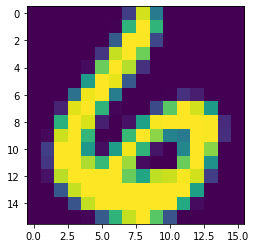

In [253]:
plt.imshow(X_train[0])

Tenemos los datos listos para aplicar un modelo de CNN. Debemos especificar la arquitectura a utilizar. Ya algunas personas han hecho propuestas en [Kaggle](https://www.kaggle.com/) con algunas arquitecturas interesantes. Consideremos la siguiente arquitectura, basada en parte en la arquitectura propuesta en este post: [CNN | Handwritten Digit Recognition](https://www.kaggle.com/code/itsmohammadshahid/cnn-handwritten-digit-recognition)

In [270]:
import tensorflow
modelo_zip = Sequential()

# Primera Convolución 2D
modelo_zip.add(Conv2D(filters = 18,
                      kernel_size=(5, 5),
                      input_shape = (16,16,1),
                      kernel_initializer = 'glorot_uniform'))
# ReLU
modelo_zip.add(LeakyReLU(alpha=0.1))
# Pooling
modelo_zip.add(MaxPooling2D((2, 2)))

# Segunda Convolución 2D
modelo_zip.add(Conv2D(filters = 16,
                      kernel_size=(5, 5),
                      kernel_initializer = 'glorot_uniform'))

# ReLU
modelo_zip.add(LeakyReLU(alpha=0.1))
# Pooling
modelo_zip.add(MaxPooling2D((2, 2)))


modelo_zip.add(Dropout(0.5))
modelo_zip.add(Flatten())

# Primera Capa Neuronal
modelo_zip.add(Dense(units=128,activation='relu'))
modelo_zip.add(LeakyReLU(alpha=0.1))

# Segunda Capa Neuronal
modelo_zip.add(Dropout(0.2))
modelo_zip.add(Dense(units=10,activation='softmax'))

# Capa final
modelo_ppt.add(Dense(3, activation='softmax'))

modelo_zip.compile(
    loss = keras.losses.categorical_crossentropy, 
    optimizer = 'adam',
    metrics = ['accuracy']
)

#Entrenamos el modelo
start = time.time()
modelo_zip.fit(X_train, train_Y_one_hot, batch_size = 18,
                epochs = 60, verbose = 0)
end = time.time()
print(f"Entrenar el modelo duró {(end - start)/60} minutos.")

#Evaluamos con respecto a la tabla de testing
test_eval = modelo_zip.evaluate(X_test, test_Y_one_hot, verbose=1)
print('\nTest loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Entrenar el modelo duró 1.4818663239479064 minutos.
63/63 [==============================] - 0s 2ms/step - loss: 0.2349 - accuracy: 0.9372

Test loss: 0.2348950356245041
Test accuracy: 0.9372197389602661


Vemos que obtuvimos una precisión relativamente alta con esta arquitectura. Veamos la matriz de confusión y las precisiones por categoría, para cada dígito.

In [274]:
labels_dig=pd.get_dummies(y_train).columns.tolist()
predicciones_test = modelo_zip.predict(np.array([X_test[i] for i in range(0,len(y_test))]), verbose = 0)
predicciones_test = [np.argmax(pred_test) for pred_test in predicciones_test]
predicciones_test = [labels_dig[pred_test] for pred_test in predicciones_test]
print(confusion_matrix(y_test, predicciones_test))

[[344   0   2   1   0   1   9   0   2   0]
 [  2 141   0   0   3   0   0   0  14   0]
 [  0   1 170   5  16   0   5   1   0   2]
 [  1   0   1 190   0   2   0   1   3   0]
 [  0   1   2   0 168   0   0   5   0   1]
 [  1   1   1   3   0 158   1   0   1   0]
 [  0   3   2   1   0   0 164   0   0   0]
 [  1   0   2   2   4   1   0 137   0   0]
 [  0   6   0   2   1   1   0   0 156   0]
 [  0   0   1   0   1   0   3   5   1 253]]


In [275]:
# Tomado de la Tarea 3:

def get_prec_multi(mat_cfn, labels):
    suma_total = sum(sum(mat_cfn))
    suma_diag = sum([mat_cfn[i,i] for i in range(mat_cfn.shape[0])])
    prec_global = suma_diag/suma_total
    err_global = 1- prec_global
    prec_digitos={} ### Creamos un diccionario con la precisión de cada dígito.
    prec_digitos['Precisión Global']=prec_global
    prec_digitos['Error Global']=err_global
    for i in range(mat_cfn.shape[0]):
        prec_este_digito = mat_cfn[i,i]/sum([mat_cfn[i,j] for j in range(mat_cfn.shape[0])])
        prec_digitos[f'Precisión "{labels[i]}"']= prec_este_digito
    return prec_digitos

In [276]:
get_prec_multi(confusion_matrix(y_test, predicciones_test), labels_dig)

{'Precisión Global': 0.9372197309417041,
 'Error Global': 0.06278026905829592,
 'Precisión "cero"': 0.958217270194986,
 'Precisión "cinco"': 0.88125,
 'Precisión "cuatro"': 0.85,
 'Precisión "dos"': 0.9595959595959596,
 'Precisión "nueve"': 0.9491525423728814,
 'Precisión "ocho"': 0.9518072289156626,
 'Precisión "seis"': 0.9647058823529412,
 'Precisión "siete"': 0.9319727891156463,
 'Precisión "tres"': 0.9397590361445783,
 'Precisión "uno"': 0.9583333333333334}

seis


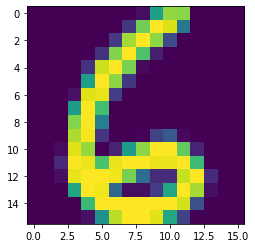

In [280]:
plt.imshow(X_test[10])
print(predicciones_test[10]) # Uba observación correctamente clasificada por el modelo.